In [10]:
from main import clean_bank_data, drop_unknown_rows, generate_summary_table, logit_regression, transform_one_hot, train_and_evaluate_logistic_regression, matrix_metrics, visualize_model_metrics
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
import shap
import matplotlib.pyplot as plt
import pandas as pd

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [11]:
path = 'bank-additional.csv'

data = clean_bank_data(path)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,0,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,0,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,0,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,0,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,0,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,0,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,0,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,0,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,0,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [12]:
cols = list(data.drop(['y'],axis=1).columns)
groupby = "y"

categorical = [
    'job','marital','education','default','loan','housing','contact','day_of_week','month','poutcome'
]

generate_summary_table(df=data, y_column=groupby, categorical_columns=categorical)

╒═════════════════════════╤═════════════════════╤═══════════╤═══════════════╤═══════════════╤═══════════════╤═══════════╕
│                         │                     │ Missing   │ Overall       │ no            │ yes           │ P-Value   │
╞═════════════════════════╪═════════════════════╪═══════════╪═══════════════╪═══════════════╪═══════════════╪═══════════╡
│ n                       │                     │           │ 4119          │ 3668          │ 451           │           │
├─────────────────────────┼─────────────────────┼───────────┼───────────────┼───────────────┼───────────────┼───────────┤
│ age, mean (SD)          │                     │ 0         │ 40.1 (10.3)   │ 39.9 (9.9)    │ 41.9 (13.3)   │ 0.002     │
├─────────────────────────┼─────────────────────┼───────────┼───────────────┼───────────────┼───────────────┼───────────┤
│ job, n (%)              │ admin.              │ 0         │ 1012 (24.6)   │ 879 (24.0)    │ 133 (29.5)    │ <0.001    │
├───────────────────────

Grouped by y                                                     
                                                 Missing        Overall             no            yes P-Value
n                                                                  4119           3668            451        
age, mean (SD)                                         0    40.1 (10.3)     39.9 (9.9)    41.9 (13.3)   0.002
job, n (%)              admin.                         0    1012 (24.6)     879 (24.0)     133 (29.5)  <0.001
                        blue-collar                          884 (21.5)     823 (22.4)      61 (13.5)        
                        entrepreneur                          148 (3.6)      140 (3.8)        8 (1.8)        
                        housemaid                             110 (2.7)       99 (2.7)       11 (2.4)        
                        management                            324 (7.9)      294 (8.0)       30 (6.7)        
                        retired                               166 (4.0)      128 (3.5)       38 (8.4)        
                        self-employed                         159 (3.9)      146 (4.0)       13 (2.9)        
                        services                              393 (9.5)      358 (9.8)       35 (7.8)        
                        student                                82 (2.0)       63 (1.7)       19 (4.2)        
                        technician                           691 (16.8)     611 (16.7)      80 (17.7)        
                        unemployed                            111 (2.7)       92 (2.5)       19 (4.2)        
                        unknown                                39 (0.9)       35 (1.0)        4 (0.9)        
marital, n (%)          divorced                       0     446 (10.8)     403 (11.0)       43 (9.5)   0.016
                        married                             2509 (60.9)    2257 (61.5)     252 (55.9)        
                        single                              1153 (28.0)     998 (27.2)     155 (34.4)        
                        unknown                                11 (0.3)       10 (0.3)        1 (0.2)        
education, n (%)        basic.4y                       0     429 (10.4)     391 (10.7)       38 (8.4)   0.002
                        basic.6y                              228 (5.5)      211 (5.8)       17 (3.8)        
                        basic.9y                             574 (13.9)     531 (14.5)       43 (9.5)        
                        high.school                          921 (22.4)     824 (22.5)      97 (21.5)        
                        illiterate                              1 (0.0)        1 (0.0)                       
                        professional.course                  535 (13.0)     470 (12.8)      65 (14.4)        
                        university.degree                   1264 (30.7)    1099 (30.0)     165 (36.6)        
                        unknown                               167 (4.1)      141 (3.8)       26 (5.8)        
default, n (%)          no                             0    3315 (80.5)    2913 (79.4)     402 (89.1)  <0.001
                        unknown                              803 (19.5)     754 (20.6)      49 (10.9)        
                        yes                                     1 (0.0)        1 (0.0)                       
housing, n (%)          no                             0    1839 (44.6)    1637 (44.6)     202 (44.8)   0.731
                        unknown                               105 (2.5)       96 (2.6)        9 (2.0)        
                        yes                                 2175 (52.8)    1935 (52.8)     240 (53.2)        
loan, n (%)             no                             0    3349 (81.3)    2975 (81.1)     374 (82.9)   0.568
                        unknown                               105 (2.5)       96 (2.6)        9 (2.0)        
                        yes                                  665 (16.1)     597 (16.

In [13]:
data['y'] = np.where(data['y']=='yes',1,0)

predictors = "age + C(job) + C(marital) + C(education) + C(housing) + C(loan) + C(contact) + C(day_of_week) + C(month) + campaign + pdays + previous + C(poutcome) + empvarrate + conspriceidx + consconfidx + euribor3m + nremployed"

logit_regression(df=data,y='y',predictors=predictors)

Optimization terminated successfully.
         Current function value: 0.267734
         Iterations 17


,OR,z-value,2.5%,97.5%
C(month)[T.mar],6.4064,0.0000,2.6499,15.4885
C(poutcome)[T.success],6.1684,0.0000,3.4623,10.9896
conspriceidx,5.1885,0.0180,1.3265,20.2947
C(month)[T.dec],2.3976,0.1336,0.7649,7.5154
C(poutcome)[T.nonexistent],1.9845,0.0116,1.1653,3.3797
C(marital)[T.single],1.3258,0.2229,0.8424,2.0865
C(education)[T.basic.6y],1.2698,0.4830,0.6515,2.4748
previous,1.2437,0.1694,0.9112,1.6974
C(education)[T.professional.course],1.2399,0.4475,0.7119,2.1596
C(education)[T.unknown],1.2258,0.5543,0.6243,2.4069


In [14]:
## Uncomment to increase sensitivity by ~10%
# add_training_features = [
#     'nremployed',
#     'empvarrate',
#     'conspriceidx',
#     'campaign',
#     'age',
#     'pdays'
# ]

# X = data[add_training_features]

X = data.drop(['y','duration'],axis=1)
y = data['y'].to_numpy()

cats = [col for col in X if X[col].dtype == np.dtype('object')]

X = transform_one_hot(X,cats)
X

,age,campaign,pdays,previous,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,2,0,0,-1.8,92.893,-46.2,1.313,5099.1,0,...,0,0,1,0,0,0,0,0,1,0
1,39,4,0,0,1.1,93.994,-36.4,4.855,5191.0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,1,0,0,1.4,94.465,-41.8,4.962,5228.1,0,...,0,0,0,0,0,0,1,0,1,0
3,38,3,0,0,1.4,94.465,-41.8,4.959,5228.1,0,...,0,0,1,0,0,0,0,0,1,0
4,47,1,0,0,-0.1,93.200,-42.0,4.191,5195.8,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,1,0,0,1.4,93.918,-42.7,4.958,5228.1,1,...,0,0,0,0,1,0,0,0,1,0
4115,39,1,0,0,1.4,93.918,-42.7,4.959,5228.1,1,...,0,0,1,0,0,0,0,0,1,0
4116,27,2,0,1,-1.8,92.893,-46.2,1.354,5099.1,0,...,0,0,0,1,0,0,0,1,0,0
4117,58,1,0,0,1.4,93.444,-36.1,4.966,5228.1,1,...,0,0,1,0,0,0,0,0,1,0


In [15]:
feature_names =  list(X.columns)
X = X.to_numpy()

smote = SMOTE()
X, y = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

model, y_pred, y_pred_prob = train_and_evaluate_logistic_regression(X_train, X_test, y_train, y_test)

In [16]:
matrix_metrics(y_test, y_pred)

,Metric,Value
0,TP,772.0000
1,TN,1004.0000
2,FP,210.0000
3,FN,435.0000
4,Prevalence,0.4100
5,Accuracy,0.7336
6,Precision,0.7862
7,NPV,0.6977
8,PPV,0.7862
9,False Discovery Rate (FDR),0.2138


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


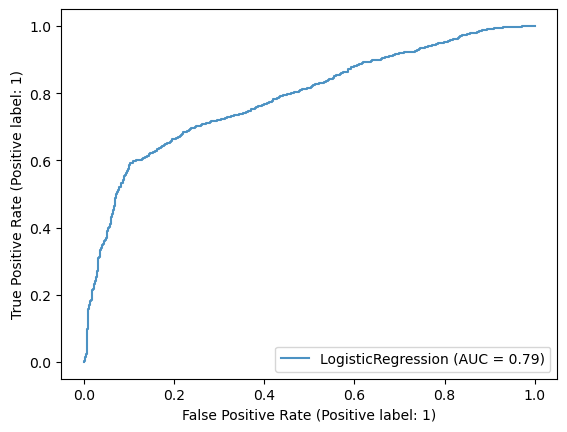

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


Confusion matrix, without normalization
[[1004  210]
 [ 435  772]]
Normalized confusion matrix
[[0.83 0.17]
 [0.36 0.64]]


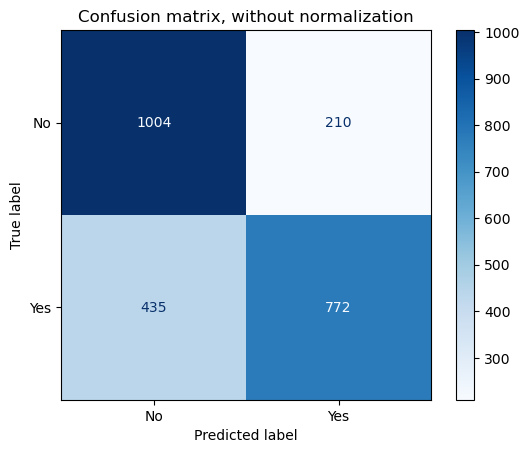

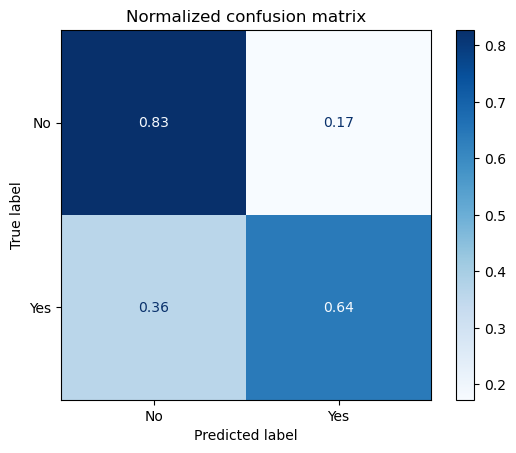

In [17]:
visualize_model_metrics(model, X_test, y_test)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.


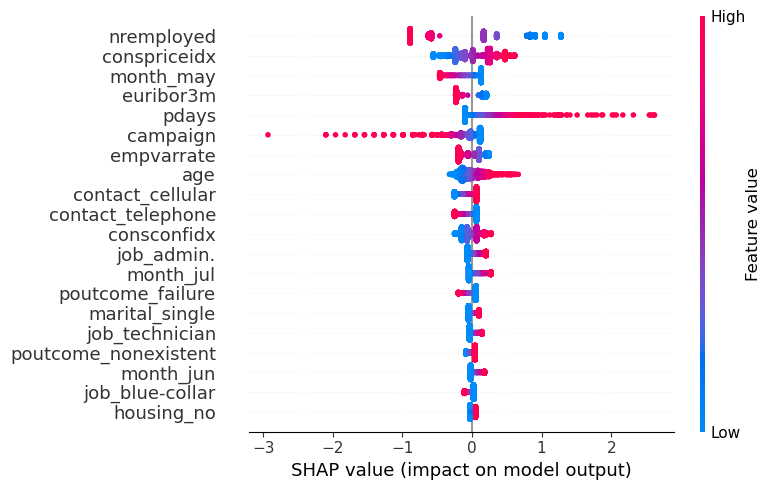

In [18]:
X_sampled = pd.DataFrame(X_test)
explainer = shap.LinearExplainer(model, X_sampled, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_sampled)

shap.summary_plot(shap_values, X_sampled,plot_size=[8,5],feature_names=feature_names)